# imports and defs

In [1]:
import numpy as np
import pandas as pd
import bcsd_module_future as bb
import matplotlib.pyplot as plt
import utility_module_2_v_3 as uu
from datetime import datetime


In [2]:
def check_for_nans_infs_zeros(data_sts):
    print('Nans:',np.sum(np.isnan(data_sts)))
    print('Infs:' ,np.sum(np.isinf(data_sts)))
    print('Zeros:',np.sum((data_sts==0)))
    

In [3]:
## check dimensions and plot ts
def data_check(data_sts,lat,lon,Np= 12):
    check_for_nans_infs_zeros(data_sts)
    map_bounds=metadata['data_bounds'] #[50 , 50, 110, 0] #ltrb
    mp_spacing=10

    plt.figure(figsize = (12,2))

    plt.subplot(121)
    uu.map_plot_cyl(np.nanmean(data_sts[:,:,:],axis=0),lat,lon,map_bounds,mp_spacing=10)
    plt.title('Mean')

    plt.subplot(122)
    plt.plot(data_sts[:Np*5,int(lat.shape[0]/2),int(lon.shape[0]/2)])
    plt.plot(data_sts[-Np*5:,int(lat.shape[0]/2),int(lon.shape[0]/2)])


# Exp details

In [4]:
exp_names = ['US_P_BCSD',
'US_P_BCSD_eqm',
'US_T_BCSD',
'US_T_BCSD_eqm',]

SD_types = ['PREC','PREC','TEMP','TEMP']
bc_methods = [bb.gamma_quantile_mapping,bb.empirical_quantile_mapping,bb.normal_quantile_mapping,bb.empirical_quantile_mapping]
var_types = ['pre','pre','tas','tas']

df = pd.DataFrame(list(zip(exp_names, SD_types,bc_methods,var_types)),
               columns =['exp_names', 'SD_types','bc_methods', 'var_types'])
df

,exp_names,SD_types,bc_methods,var_types
0,US_P_BCSD,PREC,<function gamma_quantile_mapping at 0x7f59a052...,pre
1,US_P_BCSD_eqm,PREC,<function empirical_quantile_mapping at 0x7f59...,pre
2,US_T_BCSD,TEMP,<function normal_quantile_mapping at 0x7f59a56...,tas
3,US_T_BCSD_eqm,TEMP,<function empirical_quantile_mapping at 0x7f59...,tas


# Runs

In [6]:


for gcm_name in ['CanESM2','GFDL_CM3','MIROC_ESM','MRI_ESM1','ACCESS1_0','NorESM1_M','CM5A_LR','CNRM_CM5','MPI_ESM_MR']:
    for itr in [2]:
        exp_name = df['exp_names'][itr]
        SD_type = df['SD_types'][itr]
        bc_method = df['bc_methods'][itr]
        var_type = df['var_types'][itr]

        path_out = '/home/vikram/BCSD_data/' + exp_name  + '/'
        metadata = np.load(path_out+var_type +'_metadata'+gcm_name + '.npy',allow_pickle=True).item()
        pre_obs = np.load(path_out+var_type +'_obs'+ '.npy')
        pre_gcmh = np.load(path_out+var_type +'_gcm_'+gcm_name+ '.npy')[10*12:,:,:]
        pre_gcmf = np.load(path_out+var_type +'_gcm_future_'+gcm_name+ '.npy')

        # rdn=  np.random.randn(pre_gcm.shape[0],pre_gcm.shape[1],pre_gcm.shape[2])
        
        # if SD_type == 'PREC':
        #     rdn =np.exp(rdn) 
        #     print(SD_type)
        # else:
        #     pass
        
        print("Experiment Name:",exp_name)
        print('\n\nData precheck :')
        # data_check(pre_obs, metadata['lat_obs'], metadata['lon_obs'])
        # data_check(pre_gcm, metadata['lat_gcm'], metadata['lon_gcm'])
        # data_check(rdn, metadata['lat_gcm'], metadata['lon_gcm'])

        path_out = metadata['path_out']

        print("\n\nStarted BCSD at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
        print('GCM name : ', gcm_name)
        print('Output path : ',path_out)

        data_bcsd_pred = bb.bcsd(var_type +'_'+gcm_name+'_cru',pre_obs,pre_gcmh,pre_gcmf,metadata,bc_method,temporal_res = "Monthly",sd_type =SD_type,mode = 1)
        # data_bcsd_rnd = bb.bcsd(var_type +'_rnd_0_cru',pre_obs,rdn,rdn,metadata,bc_method,temporal_res = "Monthly",sd_type =SD_type,mode = 1)

        print("Finished at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))


        print('\n\nData postcheck :')
        # data_check(pre_obs, metadata['lat_obs'], metadata['lon_obs'])
        # data_check(pre_gcm, metadata['lat_gcm'], metadata['lon_gcm'])
        # data_check(rdn, metadata['lat_gcm'], metadata['lon_gcm'])
        # data_check(data_bcsd_pred, metadata['lat_obs'], metadata['lon_obs'])
        # data_check(data_bcsd_rnd, metadata['lat_obs'], metadata['lon_obs'])


Experiment Name: US_T_BCSD


Data precheck :


Started BCSD at: 03/10/2023 14:44:22
GCM name :  CanESM2
Output path :  /home/vikram/BCSD_data/US_T_BCSD/
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 95.0
Bias correction fucntion : <function normal_quantile_mapping at 0x7f59a5661dc0>
BC Input shape (1260, 11, 22) (1140, 11, 22) (1140, 11, 22)
11 22


  0%|                  | 0/11 [00:00<?, ?it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.6604761904762 0.9943577788151758
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.6242857142857 1.089694458830292
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.3490476190476 1.0476727258975373
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.60809523809525 1.0077585644702005
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.52619047619044 0.9903846111509084
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.09952380952376 0.9823319009982404
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.5547619047619 0.8040825534946422
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.64619047619044 0.6474747738456238
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.6547619047618 0.7588689519065869
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.2290476190476 0.8871243256505791
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.177619047619 0.972135130533889
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.8052380952381 0.9724765588930018
Values  []
Nan

  9%|▉         | 1/11 [00:00<00:02,  3.92it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.96809523809526 0.545244541446613
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.7195238095238 0.5465256164473036
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.1138095238095 0.6950332379203623
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.80047619047616 0.9675815515794565
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.86047619047616 1.0090942482315766
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.6471803571428 1.1227056725655595
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.9290851190476 1.1418193700944586
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.3395613095238 0.9255036013434897
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.75289464285714 0.865250543716302
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.48908511904756 0.7757632478920649
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.2281327380952 0.5910412043296308
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.9567041666666 0.6083962785438702
Values  []
N

 18%|█▊        | 2/11 [00:00<00:02,  3.72it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 302.5745934808482 0.6840902217320073
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 302.69612035938405 0.7601306481540392
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.8724357241274 0.8963761030348725
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.0355237351746 1.1694543739342418
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.51752769515053 1.6093588567944157
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.90457652693306 1.7080047241735317
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.760485830807 1.8269463930813543
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.12782369330915 1.6722961948049258
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.0633782916763 1.568158237305965
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.4370994948547 1.0862501239289246
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.2864784300731 0.9312153519292772
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 301.434121386246 0.715075348989562
Values  []
Nans

 27%|██▋       | 3/11 [00:00<00:02,  3.70it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.8912163898513 1.1706779062925265
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.9665713405935 1.2273705386933944
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.4697927861046 1.2862148416324317
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.6653254982664 1.2488775130753214
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.57215062918533 1.1653512556619432
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.53297766938346 1.126650305625476
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.04823807620255 1.0462610002710246
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.08577651620175 1.102492866021558
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.70504722314695 1.162494077211277
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.73346409400233 1.1439582563980109
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.1294328577889 1.0064906773487214
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.8020088366544 1.0822752477329773
Values  []
N

 36%|███▋      | 4/11 [00:01<00:01,  3.59it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.7344435564787 1.2015840224112975
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.380287440335 1.0620113509857136
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.52793575292395 0.8007017694580126
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.2883758350137 0.7454440707623183
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.76186573431744 1.2147109283594617
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.1954152571456 1.521196059641225
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.66842356001456 1.6224289164607608
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.5204645915411 2.109396153320236
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 283.3082760831051 2.485078314144952
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.4604776731067 2.1200602929577963
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.0746606951145 1.9508866208033524
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.779623379682 1.1828267542029907
Values  []
Nans 0

 45%|████▌     | 5/11 [00:01<00:01,  3.65it/s]

282.6109403018284 2.199823800821909
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.0967250489213 1.5881560638063927
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.9717559477958 1.4068543375239437
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.11907734035657 1.394495464827133
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.2997499696805 1.1985203030137086
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.53822541675675 1.2413290878927465
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.17264681908443 1.402585248154872
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.02886148036316 1.405078502013095
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 281.7884602271231 1.7547199678016125
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.82619839438246 1.9242122407083913
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.93939436474074 2.4840310131057795
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 279.7537306282851 2.567207687957712
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284

 55%|█████▍    | 6/11 [00:01<00:01,  3.67it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.01761904761906 0.8517204144548203
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.4633333333333 0.8496572604982915
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.45666666666665 1.1000663760637543
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.60238095238094 1.3894908446104395
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 283.28523809523807 1.4969798772309766
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 278.0833333333333 2.04770099503794
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.6480952380952 2.4268726084400005
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 277.2623809523809 2.105353504446417
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 281.2671428571428 1.7784132651036448
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.80523809523805 1.2027730619484083
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.8404761904762 1.2092913162378813
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.5128571428571 1.0318967411295297
Values  []
Na

 64%|██████▎   | 7/11 [00:01<00:01,  3.52it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.7083868642542 1.84925746206287
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 277.35004967239655 1.9007199264774723
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 271.2170969914681 2.6395634986478904
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 268.49717585365016 3.2290396297353103
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 271.212903056641 3.1897214283071658
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 277.2324301330261 2.8045155673545503
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.32912970136647 1.843042576670833
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.190005045182 1.8113204406197496
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.44158095733826 1.6785021466808592
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.28204308044894 1.6078422790992195
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.06358445750095 1.582372853944917
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.2981066335941 1.618542298126366
Values  []
Nans 

 73%|███████▎  | 8/11 [00:02<00:00,  3.69it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 281.4462736044705 1.5707012078656688
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.52412439108076 1.2331815294049313
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.51127211704716 1.214090956427794
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 279.87255219543266 1.3966545255628915
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 274.66122255729294 1.6446941500167833
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 267.6063048854589 2.220290172194494
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 264.04635034323286 2.3911858870481066
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 267.5064852048333 3.067936913474429
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 269.15708628794664 2.949729745070683
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 272.7701008131065 2.5188435688529154
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 278.3431513140078 1.9221994637836906
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 283.6914806500366 1.6866170794517692
Values  []
Na

 82%|████████▏ | 9/11 [00:02<00:00,  3.80it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.7441711149007 1.237504005118343
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 278.66128210958067 1.340189639855512
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 271.4590895073261 1.7335290677663098
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 264.01159348188133 2.665330045657226
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 260.7733754666967 2.5271155080478387
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 261.94086873826103 2.5277799410774695
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 268.0249596537424 2.1723562643950323
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 275.52326349519194 1.5140894648608068
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.9349600717167 1.53982172002769
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.066185059282 1.0635402766950466
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.98478367897906 1.118455328648156
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.55373689663986 1.2303561061957393
Values  []
Nans 

 91%|████████▏| 10/11 [00:02<00:00,  3.80it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 257.3710989204188 2.98645971458833
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 264.1478689408716 2.795756986684925
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 273.70245070594245 2.079008055414844
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 281.8474665626316 1.8913241586568963
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.5485476568868 1.4876997759516257
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.46180508696733 1.2116999284660084
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.82487964858905 1.4255267956615836
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 283.7989076503456 1.4233905546025498
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 277.4606864003669 1.8651683580594673
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 268.98653390713 2.151480554733361
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 259.5349420037222 3.1980711938039104
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 254.72182061794396 2.6980012238094493
Values  []
Nans 0


100%|█████████| 11/11 [00:02<00:00,  3.72it/s]


Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.24712380952377 2.087623338108207
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.43902857142854 1.6764522083264757
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.4490285714285 1.3376252881747717
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.9372428571428 1.5401998721784458
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.35629047619045 1.600778385632841
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 278.37188571428567 2.2227978860384185
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 268.4779571428571 2.973373533558812
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 259.43402857142854 3.737809835176949
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 254.64557619047616 3.704519088627351
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 257.6939095238095 3.8114501379651977
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 265.7615285714285 3.1698543390213154
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.16295714285707 2.4547114908683993
Values  []
Na

100%|███| 1140/1140 [00:00<00:00, 2124.46it/s]


SD Output shape (1140, 52, 112)
Finished at: 03/10/2023 14:44:26


Data postcheck :
Experiment Name: US_T_BCSD


Data precheck :


Started BCSD at: 03/10/2023 14:44:26
GCM name :  GFDL_CM3
Output path :  /home/vikram/BCSD_data/US_T_BCSD/
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 95.0
Bias correction fucntion : <function normal_quantile_mapping at 0x7f59a5661dc0>
BC Input shape (1260, 14, 24) (1140, 14, 24) (1140, 14, 24)
14 24


  0%|                  | 0/14 [00:00<?, ?it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.39190476190475 0.9532431811234101
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.39619047619044 0.9881366600612089
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.1842857142857 0.9748580918881097
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.38095238095235 0.9147307944438391
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.2438095238095 0.9329087955752546
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.7628571428571 0.8408903606531908
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.8795238095238 0.652420228223351
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.067619047619 0.5557055126414046
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.13190476190476 0.6848748168382516
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.5461904761905 0.8468061912997501
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.55476190476185 0.8882975640843972
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.3538095238095 0.8938066062818645
Values  []
N

  7%|▋         | 1/14 [00:00<00:04,  2.63it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.87438571428567 1.6259373016335947
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.93200476190475 1.5804779839011927
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.9462904761905 1.2895864091157152
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.38724285714284 1.2520655043610471
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.22105238095236 1.2569953015857362
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.6986714285714 1.186721316482184
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.0981952380952 1.2718176683022986
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.00152857142854 1.2988173584504692
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.0786714285714 1.2263545891100576
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.96105238095237 1.4551710904544317
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.2034333333333 1.549320383521001
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.60343333333327 1.733771922533379
Values  []


 14%|█▍        | 2/14 [00:00<00:04,  2.99it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.6901 1.5554879803916408
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.7586714285714 1.1323481111822291
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.4120047619047 0.7692458833331172
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.2453380952381 0.6004174662573057
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.92533809523803 0.476301415648489
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 301.0734333333333 0.429898474541027
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.47152857142856 0.5126428787064523
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.89200476190473 0.9728241609214752
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.2691476190476 1.4426724697155942
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.5767666666667 1.7313505142444687
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.1662404761904 1.6994886519199077
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.6848119047619 1.649316219204099
Values  []
Nans 0
Infs 0

 21%|██▏       | 3/14 [00:00<00:03,  3.11it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.61295714285706 1.9227711719265599
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.2062904761905 1.9899712278141977
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.93962380952377 1.3979865664266176
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.6272428571428 1.29125314864187
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 301.9934333333333 1.32702794793598
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 303.0515285714285 1.155142892477296
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 302.7786714285714 1.1325247215394216
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.5739095238095 1.2888550703202581
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.87914761904756 1.4128118021196654
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.43343333333326 1.6725182989484664
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.3462904761904 1.6669860918392474
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.17819523809516 2.183072581407135
Values  []
Nans 

 29%|██▊       | 4/14 [00:01<00:03,  3.09it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.02533809523806 0.9986210447059992
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.97009999999995 1.46286737347613
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.72105238095236 1.6481848739400562
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.3001 2.1609521710843747
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.9329571428571 2.3303671136440607
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.6053380952381 2.0881174457199894
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.02629047619047 1.7884030551104386
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.4224809523809 1.1363261803763138
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.2481952380952 0.9476518300144353
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.15676666666667 0.9170103251915641
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.2839095238095 0.7980182369945935
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.16200476190477 0.6308544398377842
Values  []
Nans 0
In

 36%|███▌      | 5/14 [00:01<00:02,  3.00it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.5619047619047 1.0049525885410797
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.9242857142857 0.9578526153083582
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.4780952380952 0.7015942325305872
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.1271428571428 0.6359854959198441
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.74142857142857 1.0790308072493537
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.5047619047619 1.3430867753677709
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.367619047619 1.5844028611132486
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 283.2238095238095 2.0203499842742376
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 281.9628571428571 2.3382332419751397
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.6890476190476 2.0004997108149016
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.5071428571428 1.8633486059272102
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.57619047619045 1.148085263925386
Values  []
Nans

 43%|████▎     | 6/14 [00:01<00:02,  3.24it/s]

0 300.2096238095238 1.208148824758946
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.8486714285714 1.5209561081744511
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.62105238095234 1.6383903388674863
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.59105238095236 1.5141048109971718
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.10629047619045 1.776107236655416
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 278.86248095238096 2.0003068925540144
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 277.45914761904754 2.6900237293375504
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 279.627719047619 2.4935820567855607
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.4739095238095 2.393235459314192
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.77819523809524 1.5101075932895134
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.4781952380952 1.4113135355730215
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.68057619047613 1.2256678497882498
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0

 50%|█████     | 7/14 [00:02<00:02,  3.34it/s]

Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.13438571428566 0.8418888707830163
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.7224809523809 1.0028051359010697
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.315338095238 1.215380085748681
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 277.89771904761903 1.4277418226059426
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 272.68057619047613 1.976559001782729
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 264.6096238095238 2.764434801770991
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 266.76533809523806 2.4528906543827613
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 270.167719047619 1.8615787072930146
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 275.0915285714285 1.4697822505206575
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.2667666666667 1.2578452222648895
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.34152857142857 1.067361168464348
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.3553380952381 0.8624142140781251
Value

 57%|█████▋    | 8/14 [00:02<00:01,  3.39it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 278.8158142857142 2.4846798613916934
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.47581428571425 1.6143274330892323
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.07867142857145 1.7631662150917033
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.61771904761906 1.28857582795856
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.8829571428571 1.0539230244645954
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.80962380952377 1.1797718754083488
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.487719047619 1.5242137856610196
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.8867666666667 1.7120895986048148
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 279.3815285714286 1.8049041280812177
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 273.93676666666664 2.556190121354027
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 272.3862904761904 2.938484345616476
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 273.6905761904762 2.5808552960127207
Values  []
Nans

 64%|██████▍   | 9/14 [00:02<00:01,  3.32it/s]

 0
Infs 0
CDf==1 ,mu and sig 0 282.0905761904761 1.7571499548185454
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.7143857142857 1.747211578292603
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.3091476190476 1.7824378831410221
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.77962380952374 1.5523054319930119
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.8015285714285 1.4398653565170403
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.45248095238094 1.625589723796684
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 283.47486190476184 1.7204529277617524
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 275.617719047619 1.9067296978307053
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 270.4096238095238 2.5800341012705292
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 268.18867142857135 3.3324255226404627
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 270.8110523809524 3.305147363276039
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.3158142857143 2.8443621285566545
Values  []
Nans 0
I

 71%|██████▍  | 10/14 [00:03<00:01,  3.08it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.9839095238095 1.9602416668080174
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 274.18200476190475 2.2271177595132294
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 266.7767666666666 3.0213058251174925
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 263.95200476190473 3.4300279313698443
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 266.5824809523809 3.3166390112681468
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 273.1591476190476 2.8828043634163527
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 281.4534333333333 2.008200647661932
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.03486190476184 1.969712618747592
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.55867142857136 1.6865498332797733
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.9781952380952 1.4646781510515552
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.61867142857136 1.4523914129209547
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.9824809523809 1.5904923010304646
Values  []
N

 79%|███████  | 11/14 [00:03<00:00,  3.20it/s]

0 263.8172428571428 2.512652066674422
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 269.76533809523806 2.33396376323039
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 277.55152857142855 1.7412564858916906
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 284.7343857142857 1.819527859817776
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.7472428571428 1.283982431481733
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.31438571428566 1.1492588561187358
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.1362904761904 1.3437065871276532
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.7543857142857 1.3565908651875118
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.46629047619047 1.5807697829146294
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 273.75819523809525 1.8117621494467184
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 266.127719047619 2.6969381311863128
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 262.0710523809524 2.645326345448312
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 262.

 86%|███████▋ | 12/14 [00:03<00:00,  3.28it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 261.57009999999997 3.8112465152493047
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 269.52533809523806 3.095189230383513
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 278.9881952380952 2.2390955211501073
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.10248095238086 2.070408068270844
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.8962904761904 1.7326101317032394
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.7343857142857 1.4842396527982875
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.70009999999996 1.5725775020646824
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.3134333333333 1.6588186655205455
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.63533809523807 2.106508325229937
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 270.64009999999996 2.7381728353393746
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 262.5196238095238 3.340733418464066
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 258.96914761904765 3.5928658209368205
Values  []
N

 93%|████████▎| 13/14 [00:04<00:00,  3.31it/s]

[]
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.4420047619047 1.273523866501428
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.57200476190474 1.1660663178380437
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.37390952380946 1.374462583081203
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 268.55629047619044 1.74045280422045
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 258.8667666666666 2.7821939498538093
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 255.37438571428572 2.381667226022592
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 257.3624809523809 2.6498857203784634
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 264.36200476190476 2.29927031706359
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 272.53248095238087 1.5085152105927087
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.14009999999996 1.444371670938451
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.3458142857142 1.1874766019893213
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.3648619047619 1.10713968253513
Values  []
Nans

100%|█████████| 14/14 [00:04<00:00,  3.22it/s]


Infs 0
CDf==1 ,mu and sig 0 286.66819523809517 1.499573333120421
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.7767666666666 1.1371867264410247
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.0291476190476 1.4268643769165228
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.61771904761895 1.449104501019605
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.4605761904761 1.9046271380896027
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 267.35676666666666 2.31312061599195
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 257.9196238095238 3.3044882554467376
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 253.3205761904762 2.648267135479658
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 255.6281952380952 3.0687668052843895
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 262.8834333333333 2.8722205336030124
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 272.5481952380952 2.1327371615962263
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.7434333333333 1.945753210341835
Values  []
Nans 0
Infs 0


100%|███| 1140/1140 [00:00<00:00, 2112.31it/s]


SD Output shape (1140, 52, 112)
Finished at: 03/10/2023 14:44:32


Data postcheck :
Experiment Name: US_T_BCSD


Data precheck :


Started BCSD at: 03/10/2023 14:44:32
GCM name :  MIROC_ESM
Output path :  /home/vikram/BCSD_data/US_T_BCSD/
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 95.0
Bias correction fucntion : <function normal_quantile_mapping at 0x7f59a5661dc0>
BC Input shape (1260, 11, 22) (1140, 11, 22) (1140, 11, 22)
11 22


  0%|                  | 0/11 [00:00<?, ?it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.6604761904762 0.9943577788151758
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.6242857142857 1.089694458830292
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.3490476190476 1.0476727258975373
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.60809523809525 1.0077585644702005
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.52619047619044 0.9903846111509084
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.09952380952376 0.9823319009982404
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.5547619047619 0.8040825534946422
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.64619047619044 0.6474747738456238
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.6547619047618 0.7588689519065869
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.2290476190476 0.8871243256505791
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.177619047619 0.972135130533889
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.8052380952381 0.9724765588930018
Values  []
Nan

  9%|▉         | 1/11 [00:00<00:02,  3.94it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.75289464285714 0.865250543716302
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.48908511904756 0.7757632478920649
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.2281327380952 0.5910412043296308
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.9567041666666 0.6083962785438702
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.94527559523806 0.5899767473030473
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.7005136904761 0.5900966522163315
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.99670416666663 0.6779614635300119
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.6071803571428 0.9463571401615207
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.64908511904764 0.9631787885355513
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.64714285714285 1.1227056725655593
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.92904761904754 1.1418193700944577
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.3395238095238 0.9255036013434899
Values  [

 18%|█▊        | 2/11 [00:00<00:03,  2.91it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.1902556641428 1.190884138450678
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.56363880641084 1.4320395885280843
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.6189537200516 1.2665379481397914
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 292.0095808401302 1.2731986610102362
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.8837449792117 1.016763647464376
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.85627246972814 0.8645461100972857
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.05471498449583 0.7394120271024293
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.0471193970098 0.5741971168996037
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.9789816885795 0.5933292011547798
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.91892159391256 0.565529028849458
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.44192377210686 0.5900196519316107
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.0845933508278 0.7244934748411328
Values  []
Na

 27%|██▋       | 3/11 [00:00<00:02,  3.38it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.3050460357067 1.0422574818534123
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.2616508728153 0.741321254271444
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.98991732622284 0.6331515034681512
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 301.08454974319784 0.6754091458615421
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.45844268891193 0.9297790868025501
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.9159581131553 1.3530564510746157
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.04587750614763 1.7179303728443225
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.62050988997646 1.7773099464139568
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.87396715259536 2.2952145733926947
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.2139524072166 1.9195642606212808
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.2844336977799 1.6872207741817973
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.6641643234708 1.144249797795075
Values  []


 36%|███▋      | 4/11 [00:01<00:01,  3.56it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.62207316699823 2.1952960787795397
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.41169786216165 1.6342375570055947
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 296.02205812495964 1.4563595891609304
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.9840253685845 1.454594994565428
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 301.4410030949154 1.1586170938873737
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 300.9800882361563 1.2321797054626085
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.21653392958405 1.3636595995506324
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.8126585629563 1.4211284608554187
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.13711108860304 1.7144511470165809
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.5124592710491 1.6493754969851375
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.04392666653445 2.4374604483783306
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.29915755067475 2.2806887702768504
Values  [

 45%|████▌     | 5/11 [00:01<00:01,  3.73it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 299.31747471735235 1.3182393269035815
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.16466355071304 1.6136803574344027
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 286.2619169476323 1.6876545190941636
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 281.80929663748526 1.6618174762029354
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.7835774564425 1.9087013972938986
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 278.76506110460946 1.8668062548713023
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 281.2918550330444 1.7778054351210812
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.0362956092052 1.642458335008743
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.53418084694937 1.6500714542575141
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.69151882222303 1.3860734977542664
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 298.3428672109936 1.010651521862042
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.0955959790468 0.8908973647502832
Values  []


 55%|█████▍    | 6/11 [00:01<00:01,  3.62it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.1166857104068 2.4789543245991985
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 274.07369790593424 2.9513805034926586
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 275.414522614199 2.6749417986546544
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.24265494821634 2.531587858808784
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.8160660129137 1.675048181297723
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 290.9465077031156 1.6646681119578046
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 295.6234506621264 1.2602176764709767
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.75227853725704 1.101383656015788
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.0480115675724 1.1473111897417523
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.8317491019055 1.640629638167217
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 287.2791102871575 1.6590271291262921
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 280.846199191521 1.8588100274956016
Values  []
Nans 0


 64%|██████▎   | 7/11 [00:01<00:01,  3.53it/s]

Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.8425132670636 1.131447086557114
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 289.4428771355765 1.5951515656686368
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.94682062371623 1.596895016142874
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 275.7371871836579 2.067350484969454
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 270.6780064234696 2.5168776428959476
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 269.74764097863374 3.0841195359828912
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 272.27298834243413 2.988882813303203
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.47759121344734 2.6049998834922388
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.7248397894994 1.760847680723401
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.26539372202336 1.752633851243688
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.7294802120948 1.8929803698064849
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 297.2641473738444 1.614839864085385
Values  []
Nans 0

 64%|██████▎   | 7/11 [00:02<00:01,  3.09it/s]

 1.3092079539820454
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 288.94874949891084 1.3136739935454678
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 282.452018327017 1.6702179788423919
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 276.1926882759759 1.6553090449213086
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 270.0514616467436 2.293277084825906
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 269.0173753279871 2.5880985449340534
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 268.9215571939396 2.4227678908817305
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 273.71221559970905 2.2570718551817563
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 279.9614055044268 1.630031286853277
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 285.99179702609683 1.7538051890334816
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 291.58165958912775 1.3476410913625152
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 294.71990341473924 1.1499524396458838
Values  []
Nans 0
Infs 0
CDf==1 ,mu and sig 0 293.8887097289138 1



KeyboardInterrupt



# Exp details

In [4]:
exp_names = ['US_P_BCSD',
'US_P_BCSD_eqm',
'US_T_BCSD',
'US_T_BCSD_eqm',]

SD_types = ['PREC','PREC','TEMP','TEMP']
bc_methods = [bb.gamma_quantile_mapping,bb.empirical_quantile_mapping,bb.normal_quantile_mapping,bb.empirical_quantile_mapping]
var_types = ['pre','pre','tas','tas']

df = pd.DataFrame(list(zip(exp_names, SD_types,bc_methods,var_types)),
               columns =['exp_names', 'SD_types','bc_methods', 'var_types'])
df['exp_names']

0        US_P_BCSD
1    US_P_BCSD_eqm
2        US_T_BCSD
3    US_T_BCSD_eqm
Name: exp_names, dtype: object

# Runs

Experiment Name: US_P_BCSD


Data precheck :
Nans: 0
Infs: 0
Zeros: 116427
Nans: 0
Infs: 0
Zeros: 25
Nans: 0
Infs: 0
Zeros: 152128


Started BCSD at: 29/01/2023 12:50:28
GCM name :  CanESM2
Output path :  /home/vikram/BCSD_data/US_P_BCSD/
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 105.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7f974af69310>
BC Input shape (1260, 11, 22) (1260, 11, 22) (1260, 11, 22)
11 22


 27%|████████████                                | 3/11 [00:05<00:15,  1.92s/it]/home/vikram/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:2757: RuntimeWarning: divide by zero encountered in double_scalars
  aest = (3-s + np.sqrt((s-3)**2 + 24*s)) / (12*s)
/home/vikram/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:2756: RuntimeWarning: invalid value encountered in double_scalars
  func = lambda a: np.log(a) - sc.digamma(a) - s
100%|███████████████████████████████████████████| 11/11 [00:21<00:00,  1.98s/it]


BC Output shape (1260, 11, 22)
Spatial Disaggregation - Monthly (NCLIM ==  12 )
SD Type - PREC
No of timesteps  1260
SD Input shape (1260, 52, 112) (1260, 11, 22)


100%|█████████████████████████████████████| 1260/1260 [00:00<00:00, 2042.15it/s]


SD Output shape (1260, 52, 112)
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 105.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7f974af69310>
BC Input shape (1260, 11, 22) (1260, 11, 22) (1260, 11, 22)
11 22


100%|███████████████████████████████████████████| 11/11 [00:11<00:00,  1.05s/it]


BC Output shape (1260, 11, 22)
Spatial Disaggregation - Monthly (NCLIM ==  12 )
SD Type - PREC
No of timesteps  1260
SD Input shape (1260, 52, 112) (1260, 11, 22)


100%|█████████████████████████████████████| 1260/1260 [00:00<00:00, 1702.24it/s]


SD Output shape (1260, 52, 112)
Finished at: 29/01/2023 12:51:04


Data postcheck :
Nans: 396
Infs: 0
Zeros: 98054
Nans: 0
Infs: 0
Zeros: 546277
Experiment Name: US_P_BCSD_eqm


Data precheck :
Nans: 0
Infs: 0
Zeros: 116427
Nans: 0
Infs: 0
Zeros: 25
Nans: 0
Infs: 0
Zeros: 151965


Started BCSD at: 29/01/2023 12:51:07
GCM name :  CanESM2
Output path :  /home/vikram/BCSD_data/US_P_BCSD_eqm/
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 105.0
Bias correction fucntion : <function empirical_quantile_mapping at 0x7f974af693a0>
BC Input shape (1260, 11, 22) (1260, 11, 22) (1260, 11, 22)
11 22


100%|███████████████████████████████████████████| 11/11 [00:04<00:00,  2.39it/s]


BC Output shape (1260, 11, 22)
Spatial Disaggregation - Monthly (NCLIM ==  12 )
SD Type - PREC
No of timesteps  1260
SD Input shape (1260, 52, 112) (1260, 11, 22)


100%|█████████████████████████████████████| 1260/1260 [00:00<00:00, 2015.32it/s]


SD Output shape (1260, 52, 112)
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 105.0
Bias correction fucntion : <function empirical_quantile_mapping at 0x7f974af693a0>
BC Input shape (1260, 11, 22) (1260, 11, 22) (1260, 11, 22)
11 22


100%|███████████████████████████████████████████| 11/11 [00:04<00:00,  2.63it/s]


BC Output shape (1260, 11, 22)
Spatial Disaggregation - Monthly (NCLIM ==  12 )
SD Type - PREC
No of timesteps  1260
SD Input shape (1260, 52, 112) (1260, 11, 22)


100%|█████████████████████████████████████| 1260/1260 [00:00<00:00, 1928.51it/s]


SD Output shape (1260, 52, 112)
Finished at: 29/01/2023 12:51:19


Data postcheck :
Nans: 0
Infs: 0
Zeros: 36006
Nans: 0
Infs: 0
Zeros: 62198
Experiment Name: US_T_BCSD


Data precheck :
Nans: 0
Infs: 0
Zeros: 0
Nans: 0
Infs: 0
Zeros: 0
Nans: 0
Infs: 0
Zeros: 152502


Started BCSD at: 29/01/2023 12:51:21
GCM name :  CanESM2
Output path :  /home/vikram/BCSD_data/US_T_BCSD/
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 105.0
Bias correction fucntion : <function normal_quantile_mapping at 0x7f97500d81f0>
BC Input shape (1260, 11, 22) (1260, 11, 22) (1260, 11, 22)
11 22


100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 18.63it/s]


BC Output shape (1260, 11, 22)
Spatial Disaggregation - Monthly (NCLIM ==  12 )
SD Type - PREC
No of timesteps  1260
SD Input shape (1260, 52, 112) (1260, 11, 22)


100%|█████████████████████████████████████| 1260/1260 [00:00<00:00, 2129.65it/s]


SD Output shape (1260, 52, 112)
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 105.0
Bias correction fucntion : <function normal_quantile_mapping at 0x7f97500d81f0>
BC Input shape (1260, 11, 22) (1260, 11, 22) (1260, 11, 22)
11 22


100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 19.02it/s]


BC Output shape (1260, 11, 22)
Spatial Disaggregation - Monthly (NCLIM ==  12 )
SD Type - PREC
No of timesteps  1260
SD Input shape (1260, 52, 112) (1260, 11, 22)


100%|█████████████████████████████████████| 1260/1260 [00:00<00:00, 2048.84it/s]


SD Output shape (1260, 52, 112)
Finished at: 29/01/2023 12:51:25


Data postcheck :
Nans: 0
Infs: 0
Zeros: 0
Nans: 0
Infs: 0
Zeros: 0
Experiment Name: US_T_BCSD_eqm


Data precheck :
Nans: 0
Infs: 0
Zeros: 0
Nans: 0
Infs: 0
Zeros: 0
Nans: 0
Infs: 0
Zeros: 152160


Started BCSD at: 29/01/2023 12:51:27
GCM name :  CanESM2
Output path :  /home/vikram/BCSD_data/US_T_BCSD_eqm/
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 105.0
Bias correction fucntion : <function empirical_quantile_mapping at 0x7f974af693a0>
BC Input shape (1260, 11, 22) (1260, 11, 22) (1260, 11, 22)
11 22


100%|███████████████████████████████████████████| 11/11 [00:04<00:00,  2.64it/s]


BC Output shape (1260, 11, 22)
Spatial Disaggregation - Monthly (NCLIM ==  12 )
SD Type - PREC
No of timesteps  1260
SD Input shape (1260, 52, 112) (1260, 11, 22)


100%|█████████████████████████████████████| 1260/1260 [00:00<00:00, 1769.04it/s]


SD Output shape (1260, 52, 112)
Bias Correction Spatially - monthly:
Training years : 105.0 == 105.0
Testing years : 105.0
Bias correction fucntion : <function empirical_quantile_mapping at 0x7f974af693a0>
BC Input shape (1260, 11, 22) (1260, 11, 22) (1260, 11, 22)
11 22


100%|███████████████████████████████████████████| 11/11 [00:04<00:00,  2.74it/s]


BC Output shape (1260, 11, 22)
Spatial Disaggregation - Monthly (NCLIM ==  12 )
SD Type - PREC
No of timesteps  1260
SD Input shape (1260, 52, 112) (1260, 11, 22)


100%|█████████████████████████████████████| 1260/1260 [00:00<00:00, 2044.99it/s]


SD Output shape (1260, 52, 112)
Finished at: 29/01/2023 12:51:38


Data postcheck :
Nans: 0
Infs: 0
Zeros: 0
Nans: 0
Infs: 0
Zeros: 0


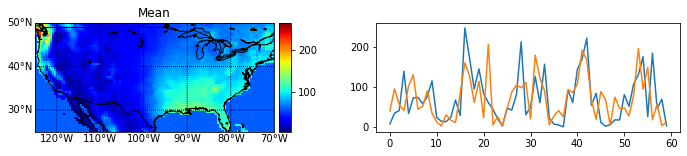

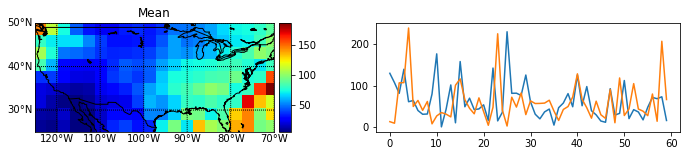

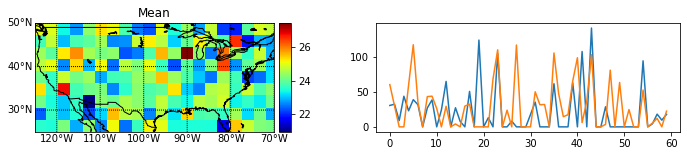

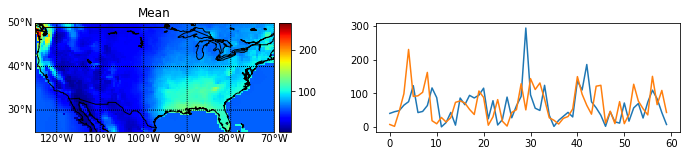

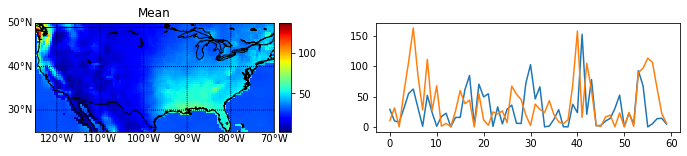

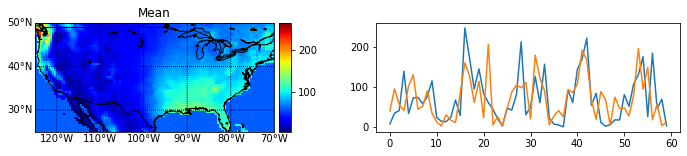

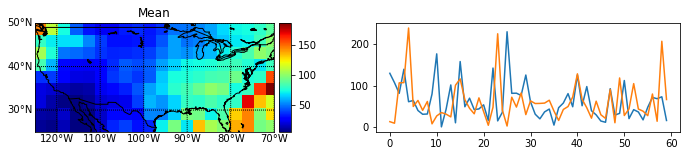

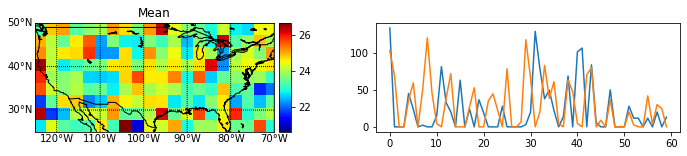

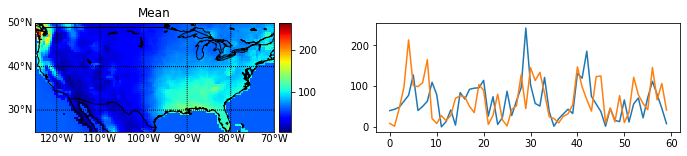

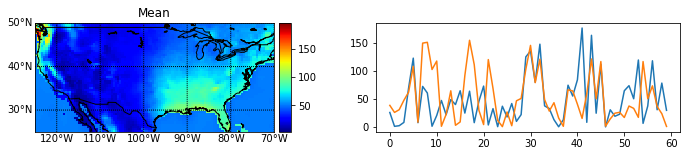

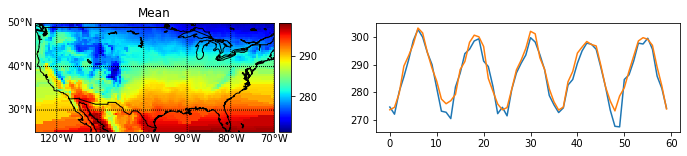

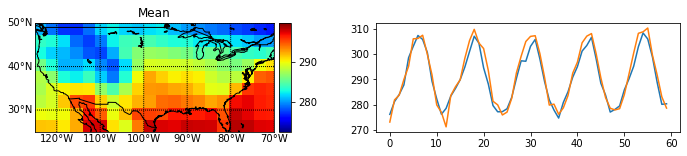

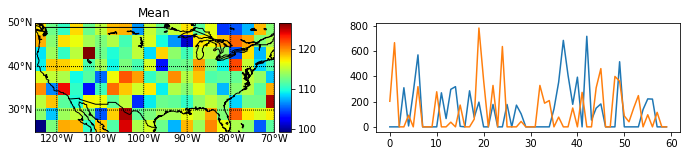

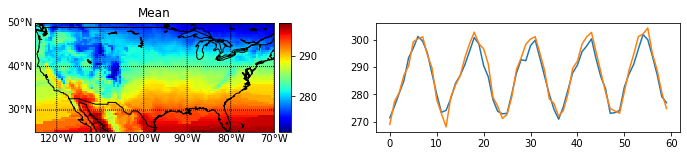

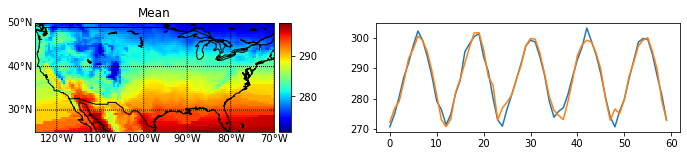

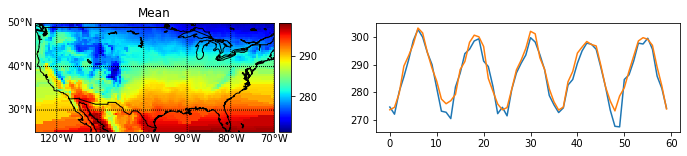

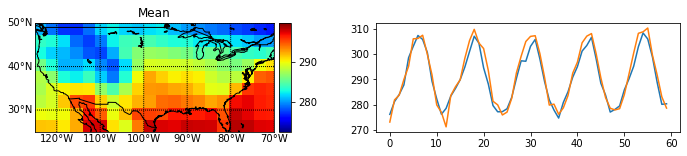

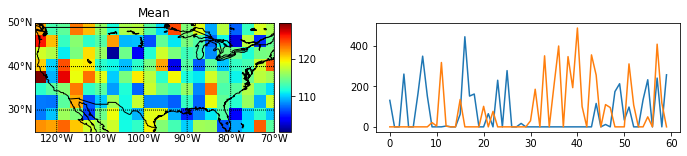

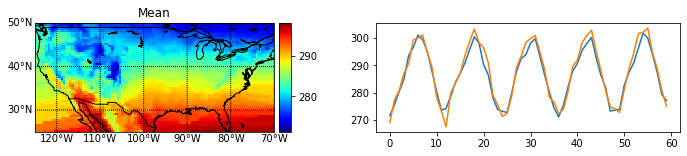

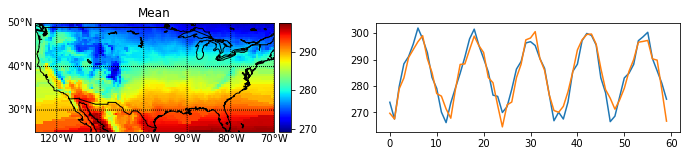

In [11]:


gcm_name ='CanESM2'


for itr in range(len(df)):
    exp_name = df['exp_names'][itr]
    SD_type = df['SD_types'][itr]
    bc_method = df['bc_methods'][itr]
    var_type = df['var_types'][itr]
    
    path_out = '/home/vikram/BCSD_data/' + exp_name  + '/'
    metadata = np.load(path_out+var_type +'_metadata'+gcm_name + '.npy',allow_pickle=True).item()
    pre_obs = np.load(path_out+var_type +'_obs'+ '.npy')
    pre_gcm = np.load(path_out+var_type +'_gcm_'+gcm_name+ '.npy')

    rdn=  np.random.randn(pre_gcm.shape[0],pre_gcm.shape[1],pre_gcm.shape[2])*np.nanmean(pre_obs)
    rdn[rdn<0]=0
    print("Experiment Name:",exp_name)
    print('\n\nData precheck :')
    data_check(pre_obs, metadata['lat_obs'], metadata['lon_obs'])
    data_check(pre_gcm, metadata['lat_gcm'], metadata['lon_gcm'])
    data_check(rdn, metadata['lat_gcm'], metadata['lon_gcm'])

    path_out = metadata['path_out']

    print("\n\nStarted BCSD at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
    print('GCM name : ', gcm_name)
    print('Output path : ',path_out)

    data_bcsd_pred = bb.bcsd(var_type +'_'+gcm_name+'_cru',pre_obs,pre_gcm,pre_gcm,metadata,bc_method,temporal_res = "Monthly",sd_type =SD_type,mode = 1)
    data_bcsd_rnd = bb.bcsd(var_type +'_rnd_new_10_cru',pre_obs,rdn,rdn,metadata,bc_method,temporal_res = "Monthly",sd_type =SD_type,mode = 1)

    print("Finished at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))


    print('\n\nData postcheck :')
    # data_check(pre_obs, metadata['lat_obs'], metadata['lon_obs'])
    # data_check(pre_gcm, metadata['lat_gcm'], metadata['lon_gcm'])
    # data_check(rdn, metadata['lat_gcm'], metadata['lon_gcm'])
    data_check(data_bcsd_pred, metadata['lat_obs'], metadata['lon_obs'])
    data_check(data_bcsd_rnd, metadata['lat_obs'], metadata['lon_obs'])


In [7]:
5

5